<a href="https://colab.research.google.com/github/simeminoski87/Daramrach_Mahijavanshi/blob/main/Laboratory_exercise_3_Introduction_to_Data_Science_(02_12_2024).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirements

In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Laboratory Exercise - Run Mode (8 points)

## Introduction
In this laboratory assignment, the focus is on time series forecasting, specifically targeting the prediction of the current **average sea-level pressure** in the city of Skopje. Your task involves employing bagging and boosting methods to forecast the average sea-level pressure. To accomplish this, you will use data from the preceding three days, consisting of average, minimal, and maximal temperatures, precipitation, as well as wind direction and speed, and the current season. By applying these ensemble learning techniques, you aim to enhance the accuracy and reliability of your predictions, gaining valuable insights into the temporal dynamics of sea-level pressure based on the given meteorological variables.

**Note: You are required to perform this laboratory assignment on your local machine.**

## The Weather Dataset

## Exploring the Weather Dataset
This dataset consists of daily weather records for the city of Skopje from January 1, 2021, to August 1, 2023. Each entry includes a unique station ID, city name, date, corresponding season (e.g., summer, winter), and various meteorological parameters such as average, minimum, and maximum temperatures in Celsius, precipitation in millimeters, average wind direction in degrees, average wind speed in kilometers per hour, and average sea-level pressure in hectopascals. The dataset offers comprehensive insights into the climatic conditions, allowing for analysis and exploration of weather patterns in Skopje over the specified time period.

The dataset comprises the following columns:
- station_id - unique ID for the weather station,
- city_name - name of the city where the station is located,
- date - date of the weather record,
- season - season corresponding to the date (e.g., summer, winter),
- avg_temp_c - average temperature in Celsius,
- min_temp_c - minimum temperature in Celsius,
- max_temp_c - maximum temperature in Celsius,
- precipitation_mm - precipitation in millimeters,
- avg_wind_dir_deg - average wind direction in degrees,
- avg_wind_speed_kmh - average wind speed in kilometers per hour, and
- avg_sea_level_pres_hpa - average sea-level pressure in hectopascals.

*Note: The dataset is complete, with no missing values in any of its entries.*

Load the dataset into a `pandas` data frame.

In [4]:
from google.colab import files


uploaded = files.upload()
data=pd.read_csv('weather.csv')

Saving weather.csv to weather (1).csv


In [5]:
data.head()

,station_id,city_name,date,season,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,avg_wind_dir_deg,avg_wind_speed_kmh,avg_sea_level_pres_hpa
0,13588,Skopje,2021-01-01,Winter,5.1,0.5,13.2,0.0,330.0,5.9,1021.2
1,13588,Skopje,2021-01-02,Winter,3.0,-2.6,11.2,0.0,330.0,5.9,1021.2
2,13588,Skopje,2021-01-03,Winter,6.8,3.5,12.5,1.3,339.0,8.0,1017.8
3,13588,Skopje,2021-01-04,Winter,6.6,6.1,7.2,3.6,298.0,5.3,1011.3
4,13588,Skopje,2021-01-05,Winter,4.3,2.3,6.7,4.6,11.0,5.1,1014.5


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   station_id              943 non-null    int64  
 1   city_name               943 non-null    object 
 2   date                    943 non-null    object 
 3   season                  943 non-null    object 
 4   avg_temp_c              943 non-null    float64
 5   min_temp_c              943 non-null    float64
 6   max_temp_c              943 non-null    float64
 7   precipitation_mm        943 non-null    float64
 8   avg_wind_dir_deg        943 non-null    float64
 9   avg_wind_speed_kmh      943 non-null    float64
 10  avg_sea_level_pres_hpa  943 non-null    float64
dtypes: float64(7), int64(1), object(3)
memory usage: 81.2+ KB


Explore the dataset using visualizations of your choice.

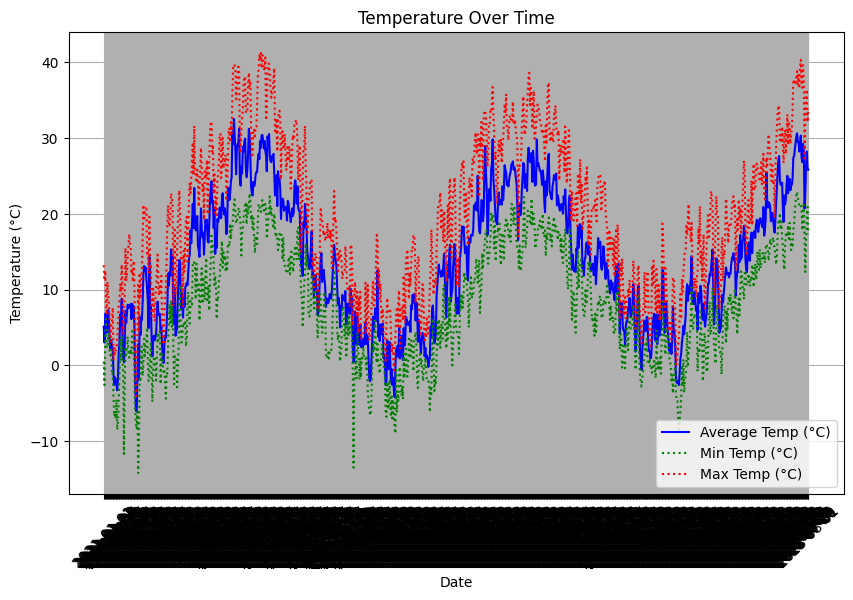

In [7]:
import matplotlib.pyplot as plt

# Line plot for average temperature
plt.figure(figsize=(10, 6))
plt.plot(data['date'], data['avg_temp_c'], label='Average Temp (°C)', color='blue')
plt.plot(data['date'], data['min_temp_c'], label='Min Temp (°C)', color='green', linestyle='dotted')
plt.plot(data['date'], data['max_temp_c'], label='Max Temp (°C)', color='red', linestyle='dotted')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Remove the highly correlated features.

In [8]:
import numpy as np

# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Find highly correlated features
threshold = 0.9  # Set the correlation threshold
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Identify columns to drop
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

# Drop the highly correlated features from the original dataset
data_cleaned = data.drop(columns=to_drop)

print("Dropped features due to high correlation:", to_drop)
print("Remaining features:", data_cleaned.columns)

Dropped features due to high correlation: ['min_temp_c', 'max_temp_c']
Remaining features: Index(['station_id', 'city_name', 'date', 'season', 'avg_temp_c',
       'precipitation_mm', 'avg_wind_dir_deg', 'avg_wind_speed_kmh',
       'avg_sea_level_pres_hpa'],
      dtype='object')


Encode the categorical features.

In [9]:
encoded_data = pd.get_dummies(data, columns=['city_name', 'season','date'], drop_first=True)

print(encoded_data.head())

   station_id  avg_temp_c  min_temp_c  max_temp_c  precipitation_mm  \
0       13588         5.1         0.5        13.2               0.0   
1       13588         3.0        -2.6        11.2               0.0   
2       13588         6.8         3.5        12.5               1.3   
3       13588         6.6         6.1         7.2               3.6   
4       13588         4.3         2.3         6.7               4.6   

   avg_wind_dir_deg  avg_wind_speed_kmh  avg_sea_level_pres_hpa  \
0             330.0                 5.9                  1021.2   
1             330.0                 5.9                  1021.2   
2             339.0                 8.0                  1017.8   
3             298.0                 5.3                  1011.3   
4              11.0                 5.1                  1014.5   

   season_Spring  season_Summer  ...  date_2023-07-23  date_2023-07-24  \
0          False          False  ...            False            False   
1          False      

# Feauture Extraction
Select the relevant features for prediction and apply a lag of one, two, and three days to each chosen feature (except `season`), creating a set of features representing the meteorological conditions from the previous three days. To maintain dataset integrity, eliminate any resulting missing values at the beginning of the dataset.

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [10]:
relevant_features = ['avg_temp_c', 'min_temp_c', 'max_temp_c', 'precipitation_mm',
                     'avg_wind_dir_deg', 'avg_wind_speed_kmh', 'avg_sea_level_pres_hpa']

# Apply lag of 1, 2, and 3 days to each feature
for feature in relevant_features:
    for lag in range(1, 4):  # Create lag for 1, 2, and 3 days
        data[f'{feature}_lag{lag}'] = data[feature].shift(lag)

# Drop rows with missing values resulting from the lag operation
data = data.dropna()

# View the updated dataset
print(data.head())

   station_id city_name        date  season  avg_temp_c  min_temp_c  \
3       13588    Skopje  2021-01-04  Winter         6.6         6.1   
4       13588    Skopje  2021-01-05  Winter         4.3         2.3   
5       13588    Skopje  2021-01-06  Winter         6.2         2.6   
6       13588    Skopje  2021-01-07  Winter         7.3         4.1   
7       13588    Skopje  2021-01-08  Winter         5.7         4.2   

   max_temp_c  precipitation_mm  avg_wind_dir_deg  avg_wind_speed_kmh  ...  \
3         7.2               3.6             298.0                 5.3  ...   
4         6.7               4.6              11.0                 5.1  ...   
5        11.0               0.0              18.0                 6.7  ...   
6         9.3               0.5               0.0                 4.5  ...   
7         8.1               7.9             346.0                 6.5  ...   

   precipitation_mm_lag3  avg_wind_dir_deg_lag1  avg_wind_dir_deg_lag2  \
3                    0.0      

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [11]:
# Define features (X) and target variable (y)
X = encoded_data.drop(columns=['avg_sea_level_pres_hpa'])  # Drop the target column from features
y = encoded_data['avg_sea_level_pres_hpa']  # Target column

# Calculate the index for the 80% split
split_index = int(0.8 * len(data))

# Manually split the dataset (do not shuffle)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Check the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")


X_train shape: (752, 952), X_test shape: (191, 952)
y_train shape: (752,), y_test shape: (191,)


## Ensemble Learning Methods

### Bagging

Create an instance of a Random Forest model and train it using the `fit` function.

In [12]:
from sklearn.ensemble import RandomForestRegressor

# Create an instance of the Random Forest model
random_forest_model = RandomForestRegressor(
    n_estimators=100,  # Number of trees in the forest
    max_depth=10,      # Maximum depth of each tree
    min_samples_split=2,  # Minimum samples required to split an internal node
    random_state=42     # For reproducibility
)

# Train the model using the training data
random_forest_model.fit(X_train, y_train)

print("Random Forest model trained successfully!")


Random Forest model trained successfully!


Use the trained model to make predictions for the test set.

In [13]:
y_pred = random_forest_model.predict(X_test)

# Display the predictions
print("Predictions for the test set:")
print(y_pred)

Predictions for the test set:
[1013.46215154 1013.91147379 1020.30213555 1016.9905971  1023.48607988
 1022.89075088 1022.16411448 1026.11917416 1020.61009267 1024.15775011
 1016.75490907 1011.2990713  1015.59963168 1026.56818895 1027.51415049
 1026.42946968 1025.18590853 1026.47517753 1025.2515719  1024.21030097
 1026.27438134 1022.30360187 1022.59874855 1020.08674591 1024.11881292
 1025.81844364 1024.88873574 1025.94977614 1017.07238422 1024.24498436
 1023.05593229 1023.92332981 1014.51089321 1022.4034872  1013.6653367
 1008.16914338 1017.93740089 1020.47556783 1013.51106499 1014.15347009
 1018.76652841 1013.5853418  1023.55226588 1022.39916616 1022.82120373
 1013.55393648 1018.96829279 1014.5776508  1013.3405703  1025.77227519
 1024.60885505 1008.26564497 1012.07615537 1017.02782248 1023.31427097
 1024.83090124 1023.33546192 1021.34240684 1014.10687626 1020.50377546
 1015.83577333 1015.9174019  1014.79872835 1015.10776463 1009.15733117
 1018.51921768 1023.30799852 1020.46436806 1012.

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [14]:
from sklearn.metrics import mean_squared_error, r2_score


decision_tree_r2 = r2_score(y_test, y_pred)


mean_squared_error(y_test, y_pred)

31.313782231122392

### Boosting

Create an instance of an XGBoost model and train it using the `fit` function.

In [17]:
from xgboost import XGBRegressor
xgb_regressor = XGBRegressor(max_depth=10, n_estimators=50, learning_rate=0.1, objective='reg:squarederror')
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Use the trained model to make predictions for the test set.

In [20]:
xgb_regressor_predict = xgb_regressor.predict(X_test)
xgb_regressor_predict

array([1010.5733 , 1008.6677 , 1016.6626 , 1020.9408 , 1022.7026 ,
       1025.1232 , 1022.48694, 1029.8722 , 1019.35724, 1024.4491 ,
       1017.3548 , 1010.65137, 1018.6389 , 1025.5958 , 1027.5085 ,
       1028.8821 , 1027.6151 , 1029.3037 , 1025.1073 , 1024.8062 ,
       1027.3914 , 1022.86707, 1018.67365, 1020.08093, 1022.5011 ,
       1025.1915 , 1025.6342 , 1021.48096, 1015.5633 , 1022.531  ,
       1021.68176, 1023.2889 , 1015.0381 , 1025.668  , 1011.99713,
       1007.57007, 1015.5917 , 1022.17633, 1009.9914 , 1016.677  ,
       1017.76086, 1017.31683, 1024.7577 , 1020.284  , 1022.1203 ,
       1013.8144 , 1020.4978 , 1015.9686 , 1012.2514 , 1028.0015 ,
       1025.3242 , 1008.826  , 1015.2077 , 1017.17694, 1027.4996 ,
       1025.4285 , 1024.7161 , 1025.9684 , 1019.3956 , 1018.6815 ,
       1013.7712 , 1012.2453 , 1015.40436, 1013.32733, 1008.65   ,
       1018.1039 , 1024.396  , 1019.83307, 1011.4365 , 1021.25116,
       1009.6242 , 1012.89844, 1018.0712 , 1018.9273 , 1024.48

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [21]:
r2_xgboost = r2_score(y_test, xgb_regressor_predict)
r2_xgboost
mean_squared_error(y_test, xgb_regressor_predict)

36.16755107361599

# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune the max_depth (`max_depth`) for the Random Forest model using a cross-validation with grid search and time series split. This involves systematically experimenting with various values for `max_depth` and evaluating the model's performance using cross-validation. Upon determining the most suitable `max_depth` value, evaluate the model's performance on a test set for final assessment.

Hints:
- For grid search use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.
- For cross-validation use the `TimeSeriesSplit` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**

In [ ]:
# Write your code here. Add as many boxes as you need.

## Fine-tuning the Random Forest Hyperparameter
Experiment with various values for `max_depth` and evaluate the model's performance using cross-validation.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Final Assessment of the Model Performance
Upon determining the most suitable `max_depth` value, evaluate the model's performance on a test set for final assessment.

In [ ]:
# Write your code here. Add as many boxes as you need.